In [12]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [20]:
# Get Data analyst jobs in the Us
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop Not A Number Values
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])


In [21]:
# Explode Job skills in list
df_da_us = df_da_us.explode('job_skills')
df_da_us[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [25]:
# Calculating and Grouping
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Top paying Skills
df_da_top_pay = df_da_us_group.sort_values(by='median', ascending=False).head(10)

df_da_skills = df_da_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)
df_da_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


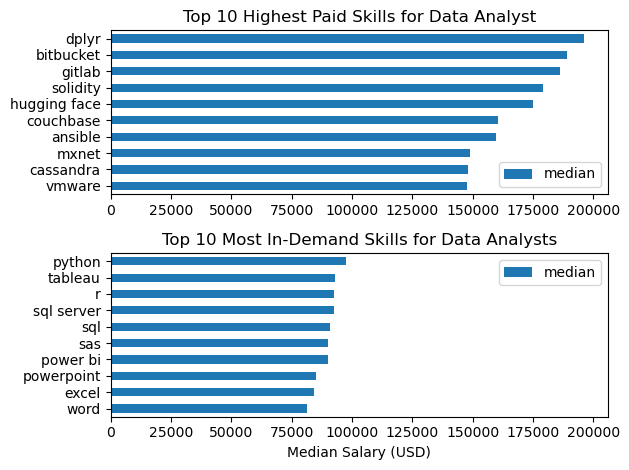

In [31]:
# Creating the plot
fig, ax = plt.subplots(2, 1)
df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()